# House Prices Prediction

### Importing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import bamboolib as bam
import seaborn as sns
import plotly.express as px


#### Load dataset

In [6]:
df = pd.read_csv(r"../data/house_price.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


#### Explore the data

In [63]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [65]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [66]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

#### Pandas profiling - optional

In [67]:
# import pandas_profiling 

# profile = droppedDf.profile_report(title='Pandas Profiling Report')
# profile.to_file(output_file="Data_Profiling_v3.html")

#### EDA for categorical and numerical features

Show the distrubition of target value that column "SalePrice"

In [68]:
fig = px.histogram(df, x='SalePrice')
fig

There are many outliers. The distrubition is like a normal distrubition. The feature is target value. Because of we will not make changing.

We will use features that have correlation with "SalePrice".

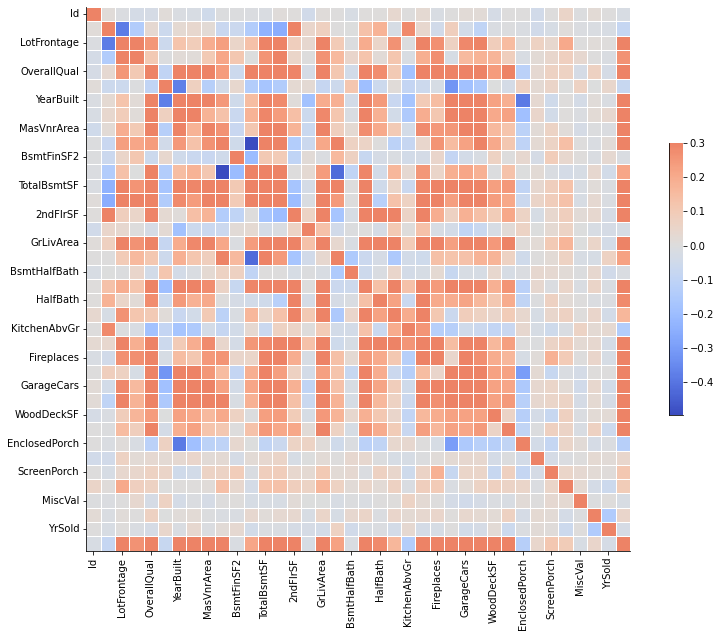

In [69]:
corr = df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

This heatmap denotes the correlation of features with 'SalePrice'. From 0 to positive 0.3, positive correlation increases; from 0 to nearly -0.5, there is a negative correlation which indicates negative relationship. It also helps to identify outliers. Features which don't have high relationship with SalePrice will be dropped.  

Features below will be dropped:
"Id", "MSSubClass", "MSZoning", "Street", "LandContour", "Utilities", "LandSlope", "Condition1", "Condition2", "BldgType", "OverallCond", "RoofStyle","RoofMatl", "Exterior1st", "Exterior2nd","MasVnrType", "ExterCond", "Foundation", "BsmtCond", "BsmtExposure", "BsmtFinType1","BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "Heating", "Electrical", "LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "HalfBath", "SaleCondition", "SaleType", "YrSold", "MoSold", "MiscVal", "MiscFeature", "Fence", "PoolQC", "PoolArea", "ScreenPorch", "3SsnPorch", "EnclosedPorch", "OpenPorchSF", "WoodDeckSF", "PavedDrive", "GarageCond", "GarageQual", "GarageType", "FireplaceQu", "Functional", "KitchenAbvGr", "BedroomAbvGr"

In [70]:
dropColumns = ["Id", "MSSubClass", "MSZoning", "Street", "LandContour", "Utilities", "LandSlope", "Condition1", "Condition2", "BldgType", "OverallCond", "RoofStyle", 
               "RoofMatl", "Exterior1st", "Exterior2nd","MasVnrType", "ExterCond", "Foundation", "BsmtCond", "BsmtExposure", "BsmtFinType1",
              "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "Heating", "Electrical", "LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "HalfBath"] + ["SaleCondition", "SaleType", "YrSold", "MoSold", "MiscVal", "MiscFeature", "Fence", "PoolQC", "PoolArea", "ScreenPorch", "3SsnPorch", "EnclosedPorch", "OpenPorchSF", "WoodDeckSF", "PavedDrive", "GarageCond", "GarageQual", "GarageType", "FireplaceQu", "Functional", "KitchenAbvGr", "BedroomAbvGr"]

droppedDf = df.drop(columns=dropColumns, axis=1)
droppedDf.head()

,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,...,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice
0,65.0,8450,NaN,Reg,Inside,CollgCr,2Story,7,2003,2003,...,1710,2,Gd,8,0,2003.0,RFn,2,548,208500
1,80.0,9600,NaN,Reg,FR2,Veenker,1Story,6,1976,1976,...,1262,2,TA,6,1,1976.0,RFn,2,460,181500
2,68.0,11250,NaN,IR1,Inside,CollgCr,2Story,7,2001,2002,...,1786,2,Gd,6,1,2001.0,RFn,2,608,223500
3,60.0,9550,NaN,IR1,Corner,Crawfor,2Story,7,1915,1970,...,1717,1,Gd,7,1,1998.0,Unf,3,642,140000
4,84.0,14260,NaN,IR1,FR2,NoRidge,2Story,8,2000,2000,...,2198,2,Gd,9,1,2000.0,RFn,3,836,250000


In [71]:
col_list=droppedDf.columns.tolist()

def splitCategoricalAndNumericalData(col_list: list):
    cat_cols=[]
    num_cols=[]
    for i in col_list:
        if df[i].dtype == "object":
            cat_cols.append(i)
        elif df[i].dtype == "int64" or df[i].dtype == "float64":
            num_cols.append(i)
    return cat_cols, num_cols

cat_cols, num_cols = splitCategoricalAndNumericalData(col_list)


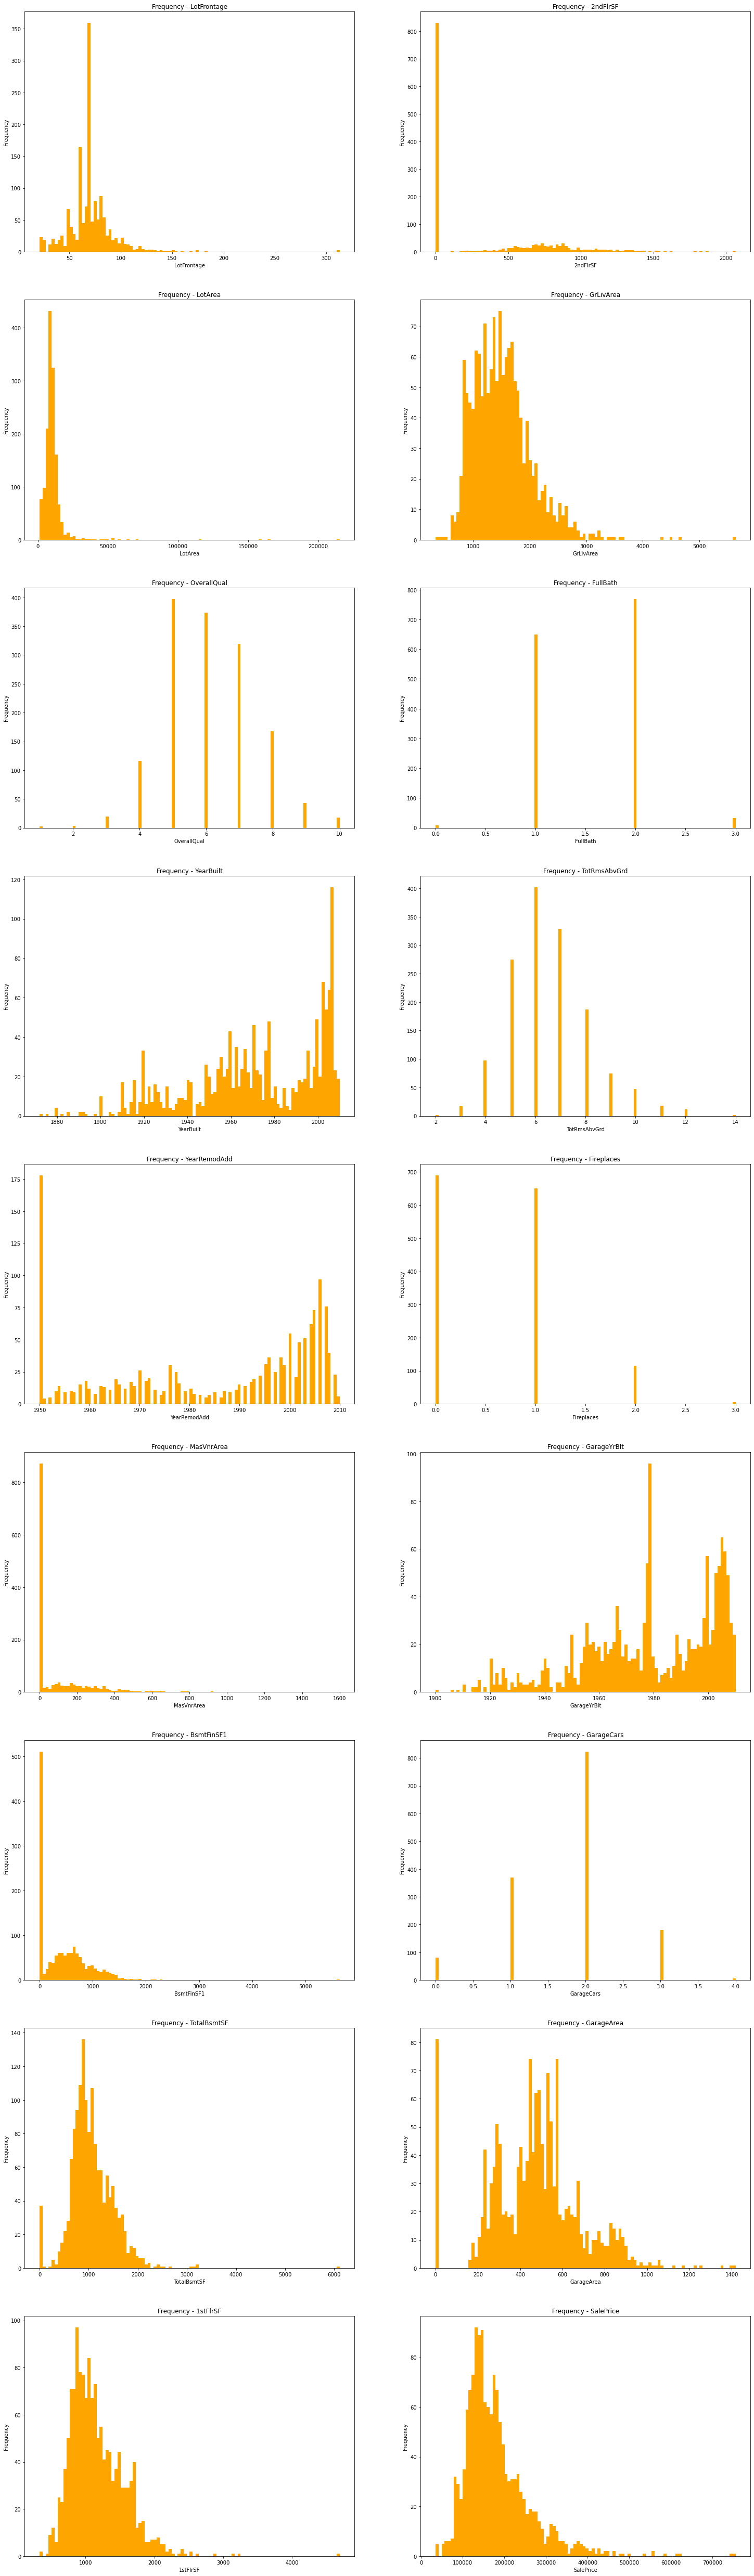

In [101]:
rowNumberOfPlot = len(num_cols)//2

def multiplePlot(row, col, df, columns):
    fig, axs = plt.subplots(row, col,figsize=(25,row*10))
    for i in range(col):
        for j in range(row):
            featureName = columns[i*row + j]
            df_i = df[featureName]
            axs[j, i].hist(df_i,bins=100,color="orange")
            axs[j, i].set_title("Frequency - {}".format(featureName))
            axs[j, i].set(xlabel=featureName, ylabel="Frequency")

multiplePlot(rowNumberOfPlot,2,df,num_cols)

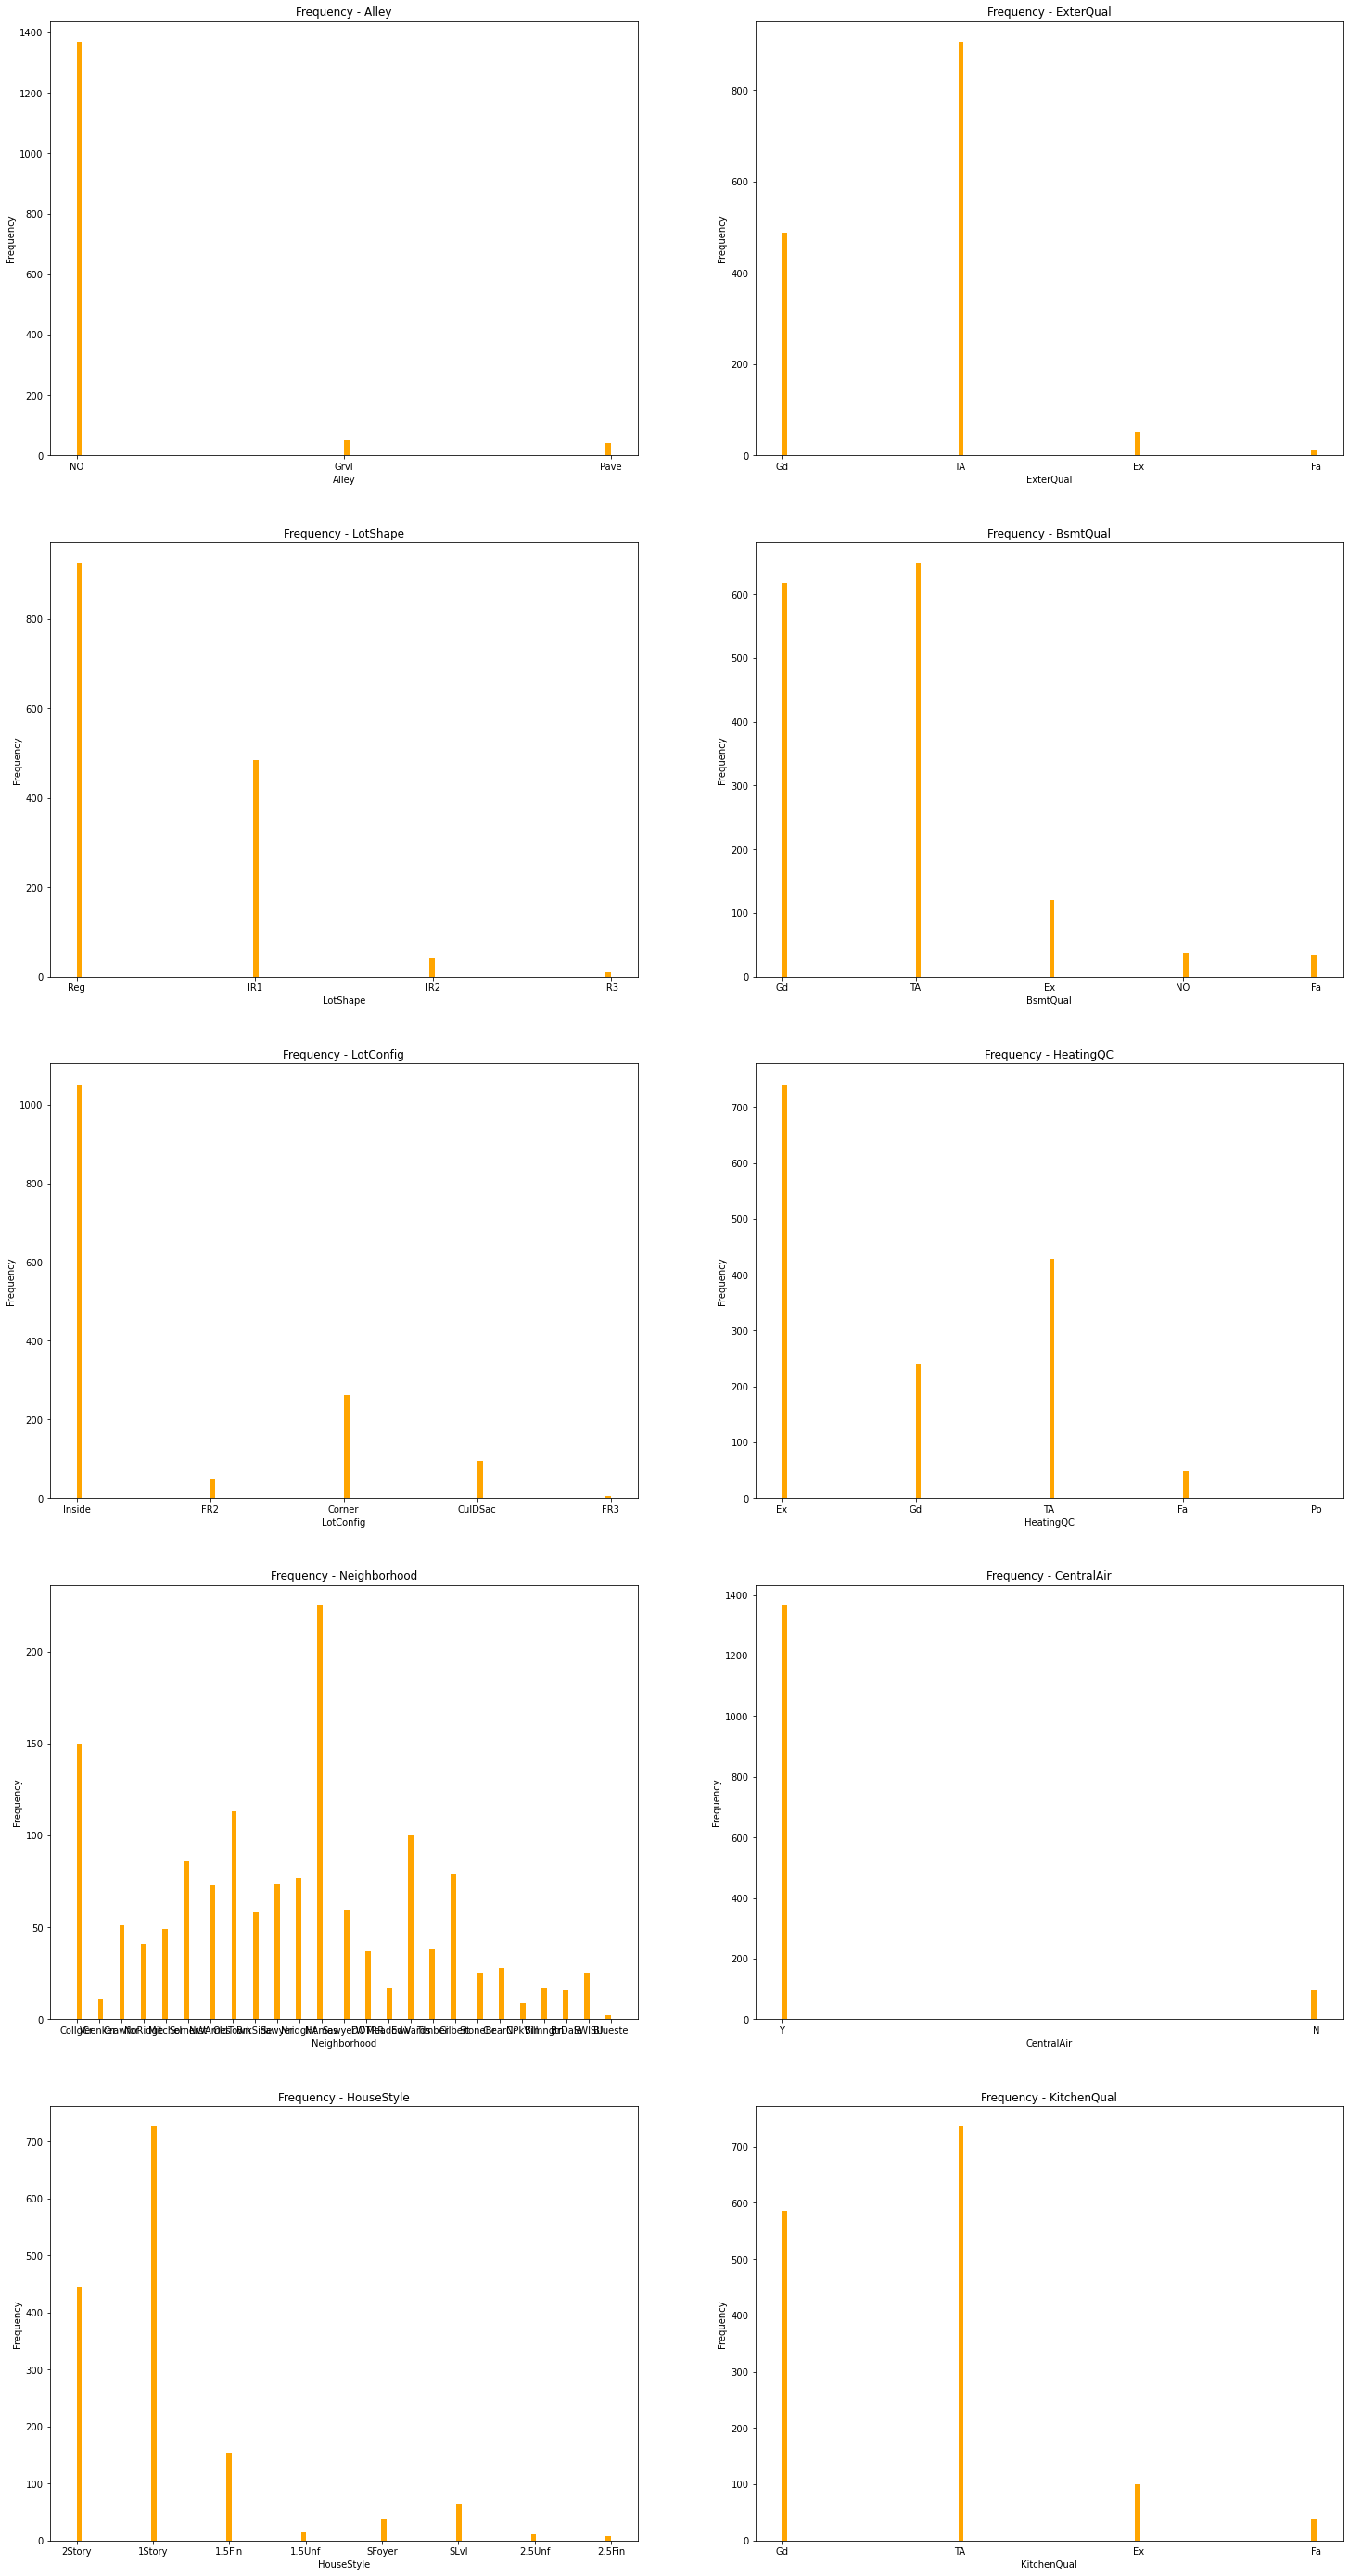

In [102]:
rowNumberOfPlot = len(cat_cols)//2

multiplePlot(rowNumberOfPlot,2,df,cat_cols)

In [76]:
droppedDf.isnull().sum().sort_values(ascending=False)

Alley           1369
LotFrontage      259
GarageFinish      81
GarageYrBlt       81
BsmtQual          37
MasVnrArea         8
CentralAir         0
GarageArea         0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
KitchenQual        0
FullBath           0
GrLivArea          0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
HeatingQC          0
LotArea            0
BsmtFinSF1         0
ExterQual          0
YearRemodAdd       0
YearBuilt          0
OverallQual        0
HouseStyle         0
Neighborhood       0
LotConfig          0
LotShape           0
SalePrice          0
dtype: int64

Filling the missing values by examining the graphics.

#### Impute missing values

"Alley" feature contains 1369 missing values. These values will be assigned to other class named "NO".

In [77]:
droppedDf["Alley"].fillna("NO", inplace=True)
droppedDf["Alley"].isna().sum()

0

"LotFrontage" feature contains 259 missing values. These values will be filled by the mean of the feature according to graph.

In [78]:
droppedDf["LotFrontage"].fillna(df.LotFrontage.mean(), inplace=True)
droppedDf["LotFrontage"].isna().sum()

0

"GarageFinish" feature contains 81 missing values. These values will be assigned to other class named "NO".

In [79]:
droppedDf["GarageFinish"].fillna("NO", inplace=True)
droppedDf["GarageFinish"].isna().sum()

0

"GarageYrBlt" feature contains 81 missing values. These values will be filled by the mean of the feature according to graph.


In [80]:
droppedDf["GarageYrBlt"].fillna(df.GarageYrBlt.mean(), inplace=True)
droppedDf["GarageYrBlt"].isna().sum()

0

"BsmtQual" feature contains 37 missing values. These values will be assigned to other class named "NO".

In [81]:
droppedDf["BsmtQual"].fillna("NO", inplace=True)
droppedDf["BsmtQual"].isna().sum()

0

"MasVnrArea" feature contains 8 missing values. Since the number of missing values is low, these values will be filled with the most repeated value, zero.

In [82]:
droppedDf["MasVnrArea"].fillna(0, inplace=True)
droppedDf["MasVnrArea"].isna().sum()

0

When "MasVnrAreaCatg" is examined, it is deemed appropriate to divide it into 3 different categories.  

In [83]:
droppedDf['MasVnrAreaCatg'] = np.where(droppedDf.MasVnrArea>1000,'BIG',
                                      np.where(droppedDf.MasVnrArea>500,'MEDIUM',
                                              np.where(droppedDf.MasVnrArea>0,'SMALL','NO')))
droppedDf['MasVnrAreaCatg'].isna().sum()

0

Checking the filled values.

In [84]:
droppedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LotFrontage     1460 non-null   float64
 1   LotArea         1460 non-null   int64  
 2   Alley           1460 non-null   object 
 3   LotShape        1460 non-null   object 
 4   LotConfig       1460 non-null   object 
 5   Neighborhood    1460 non-null   object 
 6   HouseStyle      1460 non-null   object 
 7   OverallQual     1460 non-null   int64  
 8   YearBuilt       1460 non-null   int64  
 9   YearRemodAdd    1460 non-null   int64  
 10  MasVnrArea      1460 non-null   float64
 11  ExterQual       1460 non-null   object 
 12  BsmtQual        1460 non-null   object 
 13  BsmtFinSF1      1460 non-null   int64  
 14  TotalBsmtSF     1460 non-null   int64  
 15  HeatingQC       1460 non-null   object 
 16  CentralAir      1460 non-null   object 
 17  1stFlrSF        1460 non-null   i

## Modeling

### Prepare the input data

In [85]:
inputDf = droppedDf.drop(['SalePrice'],axis=1)
inputDf = inputDf.iloc[[0]].copy()

In [86]:
for i in inputDf:
    if inputDf[i].dtype == "object":
        inputDf[i] = droppedDf[i].mode()[0]
    elif inputDf[i].dtype == "int64" or inputDf[i].dtype == "float64":
        inputDf[i] = droppedDf[i].mean()
inputDf

obj_feat = list(inputDf.loc[:, inputDf.dtypes == 'object'].columns.values)
for feature in obj_feat:
    inputDf[feature] = inputDf[feature].astype('category')

### Importing the libraries

In [87]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [88]:
df = droppedDf.copy()

Converting the "object" type data to "category" for LightGBM model.

In [89]:
obj_feat = list(df.loc[:, df.dtypes == 'object'].columns.values)
for feature in obj_feat:
    df[feature] = df[feature].astype('category')

In [90]:
# To define the input and output feature
x = df.drop(['SalePrice'],axis=1)
y = df.SalePrice

# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)
x.iloc[0].index

Index(['LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LotConfig',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinSF1',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'MasVnrAreaCatg'],
      dtype='object')

In [91]:
model = lgb.LGBMRegressor(max_depth=5, 
                          n_estimators = 100, 
                          learning_rate = 0.2,
                          min_child_samples = 30)
model.fit(x_train, y_train)

pred_y_train = model.predict(x_train)
pred_y_test = model.predict(x_test)

r2_train = metrics.r2_score(y_train, pred_y_train)
r2_test = metrics.r2_score(y_test, pred_y_test)

msle_train =metrics.mean_squared_log_error(y_train, pred_y_train)
msle_test =metrics.mean_squared_log_error(y_test, pred_y_test)

print(f"Train r2 = {r2_train:.2f} \nTest r2 = {r2_test:.2f}")
print(f"Train msle = {msle_train:.2f} \nTest msle = {msle_test:.2f}")

Train r2 = 0.97 
Test r2 = 0.91
Train msle = 0.01 
Test msle = 0.02


#### Model development using GridSearchCV

Above, the hyperparameters of the model were chosen intuitively. At this stage, optimum hyperparameter coefficients were selected by applying Grid Search Cross Validation.

In [92]:
from sklearn.model_selection import GridSearchCV

params = [{"max_depth":[3, 5], 
            "n_estimators" : [50, 100], 
            "learning_rate" : [0.1, 0.2],
            "min_child_samples" : [20, 10]}]

gs_knn = GridSearchCV(model,
                      param_grid=params,
                      cv=5)

gs_knn.fit(x_train, y_train)
gs_knn.score(x_train, y_train)

pred_y_train = model.predict(x_train)
pred_y_test = model.predict(x_test)

r2_train = metrics.r2_score(y_train, pred_y_train)
r2_test = metrics.r2_score(y_test, pred_y_test)

msle_train =metrics.mean_squared_log_error(y_train, pred_y_train)
msle_test =metrics.mean_squared_log_error(y_test, pred_y_test)

print(f"Train r2 = {r2_train:.2f} \nTest r2 = {r2_test:.2f}")
print(f"Train msle = {msle_train:.2f} \nTest msle = {msle_test:.2f}")

gs_knn.best_params_


Train r2 = 0.97 
Test r2 = 0.91
Train msle = 0.01 
Test msle = 0.02


{'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_samples': 10,
 'n_estimators': 100}

A similar result was observed between the heuristic and GridSearchCV when the results were compared.

#### Feature importance

The first 20 values that affect the model are observed. These variables will be used in the deployment phase.

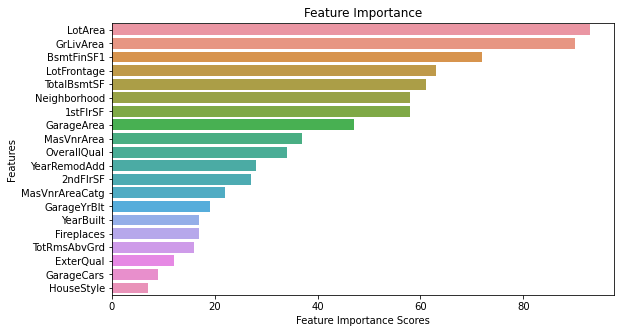

In [93]:
#show top 20 feature importance
import seaborn as sns
feature_imp = pd.Series(model.feature_importances_,index = x_train.columns).sort_values(ascending=False)[:20]
plt.figure(figsize=(9,5))
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel("Feature Importance Scores")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

#### Model save and load

The trained model can be saved and uploaded via Pickle library.

In [94]:
# save the model to disk
import pickle

filename = 'finalized_model.model'
pickle.dump(model, open(filename, 'wb'))

In [95]:
# Load the model from disk
import pickle

filename = 'finalized_model.model'

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

# predict
print(loaded_model.predict(inputDf))


0.9065596642357174
[159120.15487566]
